# 누구나 파이썬 통계분석
## CHAPTER 04. 추측통계의 기본

- 기술통계
- 추측통계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Boram Yun/TIL/Statistics/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [4]:
scores

array([ 76,  55,  80,  80,  74,  61,  81,  76,  23,  80,  41,  80,  68,
        88,  69,  57,  68,  86,  70,  68,  81,  73,  70,  90,  93,  79,
        66,  92,  88,  81,  52,  72,  59,  68,  74,  72,  63,  89,  45,
        81,  42,  76,  57,  83,  71,  74,  55,  60,  73,  79, 100,  73,
        85,  47,  50,  65,  52,  92,  64,  91,  92,  71,  78,  69,  78,
        77,  68,  78,  96,  81,  75,  72,  55,  55,  75,  49,  59,  89,
        99,  45,  94,  67,  70,  68,  86,  46,  77,  56,  79,  93,  70,
        76,  76,  58,  93,  96,  81,  71,  63,  61,  96,  91,  69,  46,
        28,  54,  68,  91,  60,  78,  90,  72,  68,  50,  52,  76,  67,
        72,  69,  80,  58,  65,  98,  58,  66,  61,  77,  85,  63,  64,
        66,  78,  59,  64,  34,  49,  68,  83,  74,  54,  49,  73,  45,
        86,  71,  46,  56,  59,  58,  48,  57,  60,  59,  87,  72,  55,
        65,  57,  65,  83,  74, 100,  76,  56,  82,  86,  86,  54,  68,
        87,  45,  63,  49,  56,  55,  89,  66,  57,  54,  72,  7

### 4. 1 모집단과 표본

- 모집단 population
- 표본 sample  
  
  
- 표본추출 sampling  
    - 표본 크기 sample size
    - 표본통계량 <-> 모수  


- 추정량 estimator : 표본평균을 모평균의 추정량으로 선택
- 추정값 estimate : 실제 표본 데이터를 이용해 계산한 결과

##### 4.1.1 표본추출 방법    

- 무작위추출 random sampling  
    - 복원추출 sampling with replacement
    - 비복원추출 sampling without replacement

In [7]:
np.random.choice([1, 2, 3], 3)

array([2, 1, 3])

In [10]:
np.random.choice([1, 2, 3], 3, replace=False)

array([1, 3, 2])

In [12]:
np.random.seed(0) # 난수 시드seed 코드의 재현성 유지
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [13]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [14]:
scores.mean()

69.53

In [16]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 63.7
2번째 무작위추출로 얻은 표본평균 66.05
3번째 무작위추출로 얻은 표본평균 71.7
4번째 무작위추출로 얻은 표본평균 74.15
5번째 무작위추출로 얻은 표본평균 70.7


### 4. 2 확률 모형

- 확률 probability  
- 확률 모형 probability model

##### 4.2.1 확률의 기본  
  
- 확률변수 random variable : 결과를 알아맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것  
- 시행 trial : 확률변수의 결과를 관측하는 것
    - 실현값 relization : 시행에 의해 관측되는 값  
- 사건 event : 시행 결과로 나타날 수 있는 일
    - 근원사건 elementary event : 더 세부적으로 분해할 수 없는 사건

- 상호배반 mutually exclusive

- 확률의 성질  
    - 사건이 서로 배반이라면, 그중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같다.
    

##### 4.2.2 확률분포  
  
- 확률분포 probability distribution : 확률변수가 어떻게 움직이는지 나타낸 것
- 확률변수 X는 확률분포 A를 따른다.
$$ X ~ A $$

In [17]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [18]:
np.random.choice(dice, p=prob)

2

In [21]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 5, 4, 2, 6, 3, 5, 3, 2, 6, 6, 6, 6, 6, 4, 2, 4, 3, 2, 2, 6, 1,
       6, 3, 2, 2, 5, 3, 4, 5, 6, 6, 3, 2, 2, 4, 3, 4, 5, 5, 3, 4, 3, 6,
       2, 5, 6, 6, 3, 4, 5, 3, 4, 3, 4, 1, 6, 2, 5, 4, 5, 6, 5, 1, 4, 5,
       5, 5, 3, 2, 4, 6, 3, 6, 5, 4, 6, 4, 6, 4, 6, 5, 5, 4, 6, 5, 3, 3,
       6, 6, 4, 5, 6, 4, 6, 5, 6, 6, 6, 3])

In [22]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency': freq,
             'relative frequency': freq / num_trial},
            index = pd.Index(np.arange(1, 7), name = 'dice'))

,frequency,relative frequency
dice,,
1,3,0.03
2,12,0.12
3,17,0.17
4,19,0.19
5,21,0.21
6,28,0.28


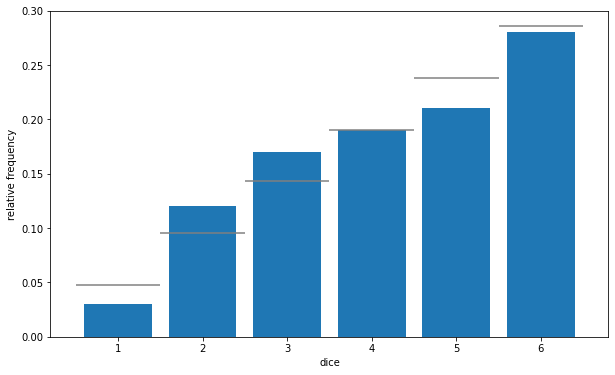

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()